In [1]:
import torch
from cornucopia import MultFieldTransform, ArrayCoilTransform
import  matplotlib.pyplot as plt
import math

plt.rcParams["figure.figsize"] = (25, 8)

Let's generate a synthetic signal magnitude. We use circles of varying radii.

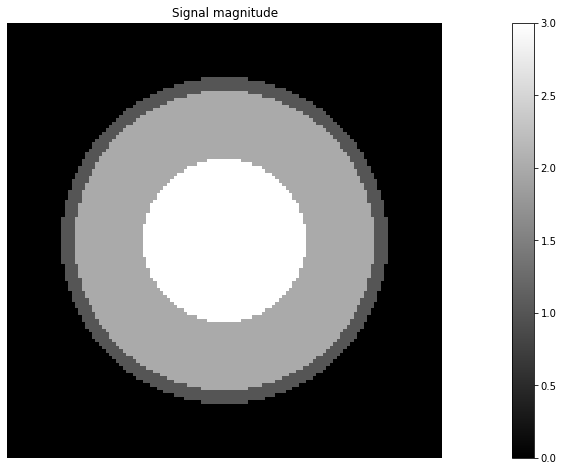

In [2]:
shape = [128, 128]
radius = torch.stack(torch.meshgrid(*[torch.arange(s).float() for s in shape]), -1)
radius -= (torch.as_tensor(shape).float() - 1) / 2
radius = radius.square().sum(-1).sqrt()

mag = torch.zeros_like(radius, dtype=torch.float32)
mag[radius < 48] = 1
mag[radius < 44] = 2
mag[radius < 24] = 3

plt.imshow(mag, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Signal magnitude')
plt.colorbar()
plt.show()

First scenario: generate individual complex coil images
(Note that with the current API, this will only work for
single channel inputs)

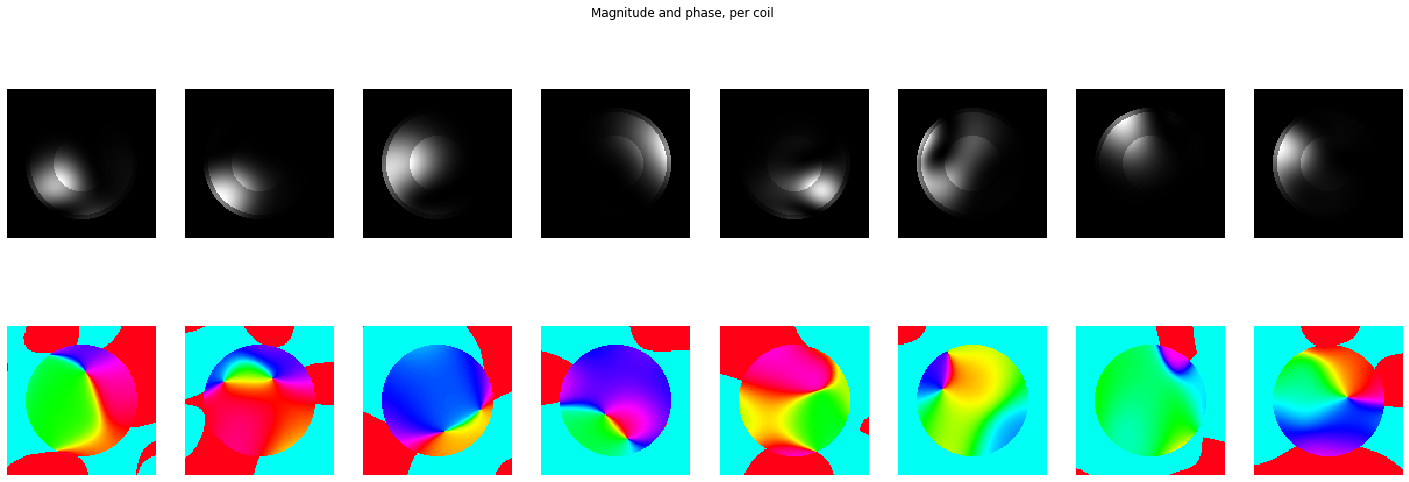

In [3]:
trf = ArrayCoilTransform(sos=False)
coils = trf(mag[None])

for k in range(len(coils)):
    plt.subplot(2, len(coils), k+1)
    plt.imshow(coils[k].abs(), cmap='gray', interpolation='nearest')
    plt.axis('off')
    plt.subplot(2, len(coils), len(coils)+k+1)
    plt.imshow(coils[k].angle(), cmap='hsv', interpolation='nearest',
               vmin=-math.pi, vmax=math.pi)
    plt.axis('off')
plt.suptitle('Magnitude and phase, per coil')
plt.show()

Second scenario: directly generate the sum-of-square image.

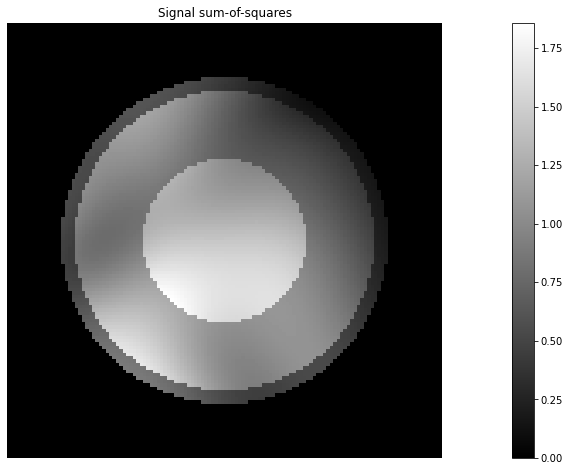

In [4]:
trf = ArrayCoilTransform()
sos = trf(mag[None])[0]


plt.imshow(sos, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Signal sum-of-squares')
plt.colorbar()
plt.show()